# Recap: What we have been doing


`1-Tensors-in-PyTorch.ipynb:` introduces a tensor representation in PyTorch

`2-Neural-networks-in-PyTorch.ipynb:` introduces a basic framework for defining neural networks via the `nn` module

`3-Training-neural-networks.ipynb:` introduces loss and backprop to improve predictions

`4-Fashion-MNIST.ipynb:` walks through the feed-forward neural network on Fashion MNIST data

`5-Inference-and-Validation.ipynb:` introduces dropout

# Saving and loading a model

In this notebook we will learn how to save and load our models. This is handy because we will often want to load previously trained models to use in making predictions or to continue training on new data.

In [25]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper
import fc_model

In [26]:
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

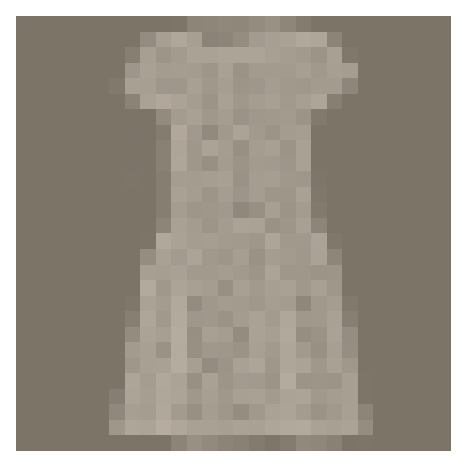

In [27]:
# Here we can see one of the images:
image, label = next(iter(trainloader))
helper.imshow(image[10,:])

In [28]:
label

tensor([5, 2, 3, 7, 7, 4, 3, 6, 4, 2, 3, 2, 7, 8, 4, 9, 7, 7, 5, 7, 8, 9, 3, 9,
        4, 9, 1, 6, 6, 6, 9, 6, 3, 1, 4, 9, 3, 3, 0, 2, 8, 6, 3, 0, 2, 7, 3, 8,
        6, 1, 0, 9, 4, 3, 7, 8, 6, 2, 3, 7, 9, 6, 0, 5])

In [33]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128, 64])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
model

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

In [35]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 2.242..  Test Loss: 1.934..  Test Accuracy: 0.267
Epoch: 1/2..  Training Loss: 1.706..  Test Loss: 1.180..  Test Accuracy: 0.510
Epoch: 1/2..  Training Loss: 1.309..  Test Loss: 0.959..  Test Accuracy: 0.567
Epoch: 1/2..  Training Loss: 1.120..  Test Loss: 0.890..  Test Accuracy: 0.596
Epoch: 1/2..  Training Loss: 1.018..  Test Loss: 0.808..  Test Accuracy: 0.672
Epoch: 1/2..  Training Loss: 0.972..  Test Loss: 0.768..  Test Accuracy: 0.681
Epoch: 1/2..  Training Loss: 0.909..  Test Loss: 0.702..  Test Accuracy: 0.742
Epoch: 1/2..  Training Loss: 0.828..  Test Loss: 0.683..  Test Accuracy: 0.718
Epoch: 1/2..  Training Loss: 0.784..  Test Loss: 0.659..  Test Accuracy: 0.769
Epoch: 1/2..  Training Loss: 0.784..  Test Loss: 0.660..  Test Accuracy: 0.728
Epoch: 1/2..  Training Loss: 0.759..  Test Loss: 0.618..  Test Accuracy: 0.768
Epoch: 1/2..  Training Loss: 0.736..  Test Loss: 0.608..  Test Accuracy: 0.767
Epoch: 1/2..  Training Loss: 0.742..  Test Loss: 0.6

As we can imagine, it is very impractical to train the network everytime we use it. Instead, we can save trained networks and load them everytime to train them more or to make predictions. The parameters for a PyTorch network are stored in a model's `state.dict`, which contains the weight and bias matrices for each of our layers.

In [39]:
model

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

In [37]:
model.state_dict()

OrderedDict([('hidden_layers.0.weight',
              tensor([[ 0.0354,  0.0118, -0.0117,  ...,  0.0083,  0.0075, -0.0140],
                      [ 0.0281, -0.0094,  0.0686,  ..., -0.0598, -0.0028,  0.0394],
                      [ 0.0203,  0.0137,  0.0013,  ..., -0.0356,  0.0322,  0.0141],
                      ...,
                      [ 0.0583,  0.0457, -0.0042,  ..., -0.0084, -0.0323,  0.0038],
                      [ 0.0126, -0.0202,  0.0190,  ...,  0.0055,  0.0213,  0.0179],
                      [ 0.0149,  0.0684,  0.0478,  ...,  0.0060, -0.0020,  0.0830]])),
             ('hidden_layers.0.bias',
              tensor([ 0.0142,  0.0922, -0.0376,  0.0231,  0.0065, -0.0263, -0.0205,  0.0459,
                       0.0135,  0.1402, -0.0228, -0.0213, -0.0380, -0.0315, -0.0299,  0.1137,
                       0.0154, -0.0350, -0.0743,  0.0621,  0.0689, -0.1075, -0.0286, -0.0140,
                      -0.0057, -0.0666, -0.0044, -0.0327,  0.1079,  0.0025, -0.0272, -0.0277,
            

In [38]:
model.state_dict().keys()

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.3.weight', 'hidden_layers.3.bias', 'output.weight', 'output.bias'])

So the terms containing weight and bias parameters are stored in `model.state_dict()` and this is what we want to save. To save them, we use `torch.save`. For example, we can save them to a file named `checkpoint.pth`.

In [41]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the `state_dict()` with `torch.load` method:

In [42]:
state_dict_2 = torch.load('checkpoint.pth')

In [43]:
# just to confirm they are the same weights and biases:
state_dict_2

OrderedDict([('hidden_layers.0.weight',
              tensor([[ 0.0354,  0.0118, -0.0117,  ...,  0.0083,  0.0075, -0.0140],
                      [ 0.0281, -0.0094,  0.0686,  ..., -0.0598, -0.0028,  0.0394],
                      [ 0.0203,  0.0137,  0.0013,  ..., -0.0356,  0.0322,  0.0141],
                      ...,
                      [ 0.0583,  0.0457, -0.0042,  ..., -0.0084, -0.0323,  0.0038],
                      [ 0.0126, -0.0202,  0.0190,  ...,  0.0055,  0.0213,  0.0179],
                      [ 0.0149,  0.0684,  0.0478,  ...,  0.0060, -0.0020,  0.0830]])),
             ('hidden_layers.0.bias',
              tensor([ 0.0142,  0.0922, -0.0376,  0.0231,  0.0065, -0.0263, -0.0205,  0.0459,
                       0.0135,  0.1402, -0.0228, -0.0213, -0.0380, -0.0315, -0.0299,  0.1137,
                       0.0154, -0.0350, -0.0743,  0.0621,  0.0689, -0.1075, -0.0286, -0.0140,
                      -0.0057, -0.0666, -0.0044, -0.0327,  0.1079,  0.0025, -0.0272, -0.0277,
            

To load these weights and biases into the network we are currently working with, we should declare:

In [44]:
model.load_state_dict(state_dict_2)

This is very useful if we create a new model with randomly initialized weights and biases. If we pass an existing `state_dict()` then the random parameters are replaced by ones we had trained previously.

Using pre-trained weights and biases seems straightforward but be careful about one thing: 

**Loading the `state_dict()` works only if the model architecture is exactly the same as the checkpoint 
architecture.** 

If we create a different architecture, this will NOT work.

In [45]:
model = Network(784, 10, [400, 200, 100, 50])
# 4 hidden layers with 400, 200, 100, and 50 units
model.load_state_dict(state_dict_2)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param of torch.Size([400, 784]) from checkpoint, where the shape is torch.Size([512, 784]) in current model.
	size mismatch for hidden_layers.0.bias: copying a param of torch.Size([400]) from checkpoint, where the shape is torch.Size([512]) in current model.
	size mismatch for hidden_layers.1.weight: copying a param of torch.Size([200, 400]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for hidden_layers.1.bias: copying a param of torch.Size([200]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for hidden_layers.2.weight: copying a param of torch.Size([100, 200]) from checkpoint, where the shape is torch.Size([128, 256]) in current model.
	size mismatch for hidden_layers.2.bias: copying a param of torch.Size([100]) from checkpoint, where the shape is torch.Size([128]) in current model.
	size mismatch for hidden_layers.3.weight: copying a param of torch.Size([50, 100]) from checkpoint, where the shape is torch.Size([64, 128]) in current model.
	size mismatch for hidden_layers.3.bias: copying a param of torch.Size([50]) from checkpoint, where the shape is torch.Size([64]) in current model.
	size mismatch for output.weight: copying a param of torch.Size([10, 50]) from checkpoint, where the shape is torch.Size([10, 64]) in current model.

This means we need to rebuild the model exactly as it was when we trained it. For this purpose, it's helpful to save the information about the model architecture in the checkpoint along with the `state_dict()`. To do this, we build a dictionary with all information we need to rebuild the model completely:

In [46]:
checkpoint = {'input_size': 784,
             'output_size': 10,
             'hidden_layers': [each.out_features for each in model.hidden_layers],
             'state_dict': model.state_dict()}

In [47]:
torch.save(checkpoint, 'checkpoint.pth')

In [48]:
checkpoint['input_size']

784

Now the checkpoint has all information to rebuild the trained model. We can easily make that a function. Similarly, we can write a function to load checkpoints.

In [49]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Network(checkpoint['input_size'],
                    checkpoint['output_size'],
                    checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    return model

In [50]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=50, bias=True)
  )
  (output): Linear(in_features=50, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
